In [155]:
# Nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/airbnb-listings/exports/csv?lang=en&facet=facet(name%3D%22host_verifications%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22amenities%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22features%22%2C%20disjunctive%3Dtrue)&qv1=(Madrid)&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B&export_format=csv"

--2023-03-19 08:37:23--  https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/airbnb-listings/exports/csv?lang=en&facet=facet(name%3D%22host_verifications%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22amenities%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22features%22%2C%20disjunctive%3Dtrue)&qv1=(Madrid)&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B&export_format=csv
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [            <=>     ]  57.85M  1023KB/s    in 65s     

2023-03-19 08:38:31 (917 KB/s) - ‘airbnb-listings.csv’ saved [60658093]



In [156]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';')

data.shape


(14780, 89)

In [157]:
import numpy as np

#LIMPIEZA Y PREPARACION DE DATOS
Vamos a limpiar los datos...

Queremos solo las propiedades de España para ser mas exactos la ciudad sera Madrid donde tenemos mas datos..

en la columna codigo postal vamos a quedarnos con los codigos postales escritos correctamente y que pertenezcan a madrid

vamos a limpiar columnas que no nos interesan, que no tienen suficientes datos y tambien limpiar las filas de precios que sean mayor a 200

## Tenemos esta lista de columnas que por logica solo viendo su nombre no aporta ninguna utlidad para realizar la predccion deseada(col relacionadas con el host,. Por ello realizamos un drop de estas.

*'Name','Host Response Rate','Host Response Time',
'ID', 'Listing Url', 'Scrape ID', 'Last Scraped',  'Medium Url', 
'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count','Host Listings Count', 'Host Total Listings Count','Host Since','Interaction', 'House Rules','Review Scores Communication', 'Review Scores Location',  'Review Scores Value','Review Scores Cleanliness',  'Review Scores Checkin','Number of Reviews','Review Scores Rating',  'Review Scores Accuracy','City', 'Country Code','Minimum Nights','Notes', 'Transit','Thumbnail Url','Host Location', 'Host About','Host Verifications','Host Acceptance Rate'*

In [158]:
#1

data = data.loc[(data['Country Code'] == 'ES') & (data['City'] == 'Madrid')]

# lista descargada online de codigos postales de madrid para asi eliminar los datos incorrectos o que este fuera de madrid
# Códigos postales válidos
valid_zipcodes = ['28000', '28001', '28002', '28003', '28004', '28005', '28006', '28007',
                  '28008', '28009', '28010', '28011', '28012', '28013', '28014', '28015', 
                  '28016', '28017', '28018', '28019', '28020', '28021', '28022', '28023', 
                  '28024', '28025', '28026', '28027', '28028', '28029', '28030', '28031', 
                  '28032', '28033', '28034', '28035', '28036', '28037', '28038', '28039', 
                  '28040', '28041', '28042', '28043', '28044', '28045', '28046', '28047', 
                  '28048', '28049', '28050', '28051', '28052', '28053', '28054', '28055']

# Códigos postales a corregir
zipcodes_to_fix = {
    '2804': '28004',
    '2015': '28015',
    '280013': '28013'
}

# Corrección de códigos postales
data['Zipcode'] = data['Zipcode'].astype(str) # Convertir la columna a tipo string
data['Zipcode'] = data['Zipcode'].str.replace('\n', '') # Remover saltos de línea
data['Zipcode'] = data['Zipcode'].str.replace('Madrid ', '') # Remover prefijo "Madrid "
data['Zipcode'] = data['Zipcode'].replace(zipcodes_to_fix) # Corregir códigos postales

# Filtrar por códigos postales válidos
data = data[data['Zipcode'].isin(valid_zipcodes)]

# Print the number of unique postal codes
print(len(data.loc[data['Country Code'] == 'ES', 'Zipcode'].unique()))


data['Zipcode'] = data['Zipcode'].astype(int)


print(np.unique(data.Zipcode))



55
[28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012
 28013 28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024
 28025 28026 28027 28028 28029 28030 28031 28032 28033 28034 28035 28036
 28037 28038 28039 28040 28041 28042 28043 28044 28045 28046 28047 28048
 28049 28050 28051 28052 28053 28054 28055]


In [159]:
# 3.vamos a ver de cuantos registros disponemos y de cuantas variables
print(data.shape)

(12751, 89)


In [160]:


# Hacemos un drop de todas las columnas que por Logica no son utiles.
not_useful_columns = ['Name','Host Response Rate','Host Response Time', 'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Medium Url', 
 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Thumbnail Url', 'Host Picture Url','Host Neighbourhood', 'Weekly Price',
  'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
  'Host Listings Count', 'Host Total Listings Count','Host Since','Interaction', 'House Rules','Review Scores Communication', 'Review Scores Location',
  'Review Scores Value','Review Scores Cleanliness', 'Review Scores Checkin','Number of Reviews','Review Scores Rating', 'Review Scores Accuracy','City',
   'Country Code','Minimum Nights','Notes', 'Transit','Thumbnail Url','Host Location', 'Host About','Host Verifications','Host Acceptance Rate']


# Hacemos un drop de todas las columnas que aportando información quedan fuera del scope y esas que tienen una gran cantidad de NA
somehow_useful_columns_but_droppable_anyway_and_too_many_missing_values = [ 'Summary', 'Space', 'Description',
       'Neighborhood Overview',  'Access', 'Maximum Nights','Street', 'State', 'Market', 'Smart Location', 'Country',
     'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names','Experiences Offered','Amenities','Cleaning Fee','Security Deposit']
     
print("eliminando columnas...")
data.drop(not_useful_columns, axis=1, inplace=True)
data.drop(somehow_useful_columns_but_droppable_anyway_and_too_many_missing_values, axis=1, inplace=True)
print('data.shape')


print("las columnas que nos quedan y su tipo son:")
data.dtypes

eliminando columnas...
data.shape
las columnas que nos quedan y su tipo son:


Neighbourhood                    object
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
Zipcode                           int64
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Price                           float64
Guests Included                   int64
Extra People                      int64
Availability 30                   int64
Availability 60                   int64
Availability 90                   int64
Availability 365                  int64
Cancellation Policy              object
Features                         object
dtype: object

# Exploramos un poco mas a fondo

In [161]:
print('Numero de Variables unicas por columnas:')
data.apply(lambda x: len(x.unique()))

Numero de Variables unicas por columnas:


Neighbourhood                      66
Neighbourhood Cleansed            125
Neighbourhood Group Cleansed       21
Zipcode                            55
Latitude                        12751
Longitude                       12751
Property Type                      22
Room Type                           3
Accommodates                       16
Bathrooms                          17
Bedrooms                           11
Beds                               17
Bed Type                            5
Price                             276
Guests Included                    14
Extra People                       52
Availability 30                    31
Availability 60                    61
Availability 90                    91
Availability 365                  366
Cancellation Policy                 5
Features                           60
dtype: int64

In [162]:
print('Observamos el porcentaje de valores nan en cada columna')
data.notnull().mean().mul(100).sort_values(ascending=False)

Observamos el porcentaje de valores nan en cada columna


Features                        100.000000
Availability 365                100.000000
Availability 60                 100.000000
Availability 30                 100.000000
Extra People                    100.000000
Guests Included                 100.000000
Bed Type                        100.000000
Neighbourhood Cleansed          100.000000
Cancellation Policy             100.000000
Accommodates                    100.000000
Room Type                       100.000000
Property Type                   100.000000
Longitude                       100.000000
Latitude                        100.000000
Zipcode                         100.000000
Neighbourhood Group Cleansed    100.000000
Availability 90                 100.000000
Price                            99.937260
Bedrooms                         99.898047
Beds                             99.694142
Bathrooms                        99.623559
Neighbourhood                    68.355423
dtype: float64

In [163]:
# Obtener la media de cada columna numérica
mean_values = data.select_dtypes(include=[np.number]).mean()

# Llenar los valores faltantes con la media
data.fillna(mean_values, inplace=True)

Tenemos 3 columnas de vecindario, la primera (Neighbourhood) que tiene una gran cantidad de NA, por lo que vamos a eliminarla, luego tenemos neighborhood group cleansed seria la que tiene menos variables unicas ya que neighbourhood cleansed tiene muchas mas, por lo que vamos a eliminar la columna con mas variables unicas y la variables con mas nan.

In [164]:
data.drop(['Neighbourhood','Neighbourhood Cleansed'], axis=1, inplace=True)

In [165]:
#Creamos funcio de limpieza de valor Cero sustituido por la media de cada columna
def clean_zeros(df):
    for col in df.select_dtypes(include=['int64', 'float64']):
        mean = df[col].mean()
        df[col] = df[col].replace(0, mean)
    return df
data=clean_zeros(data)

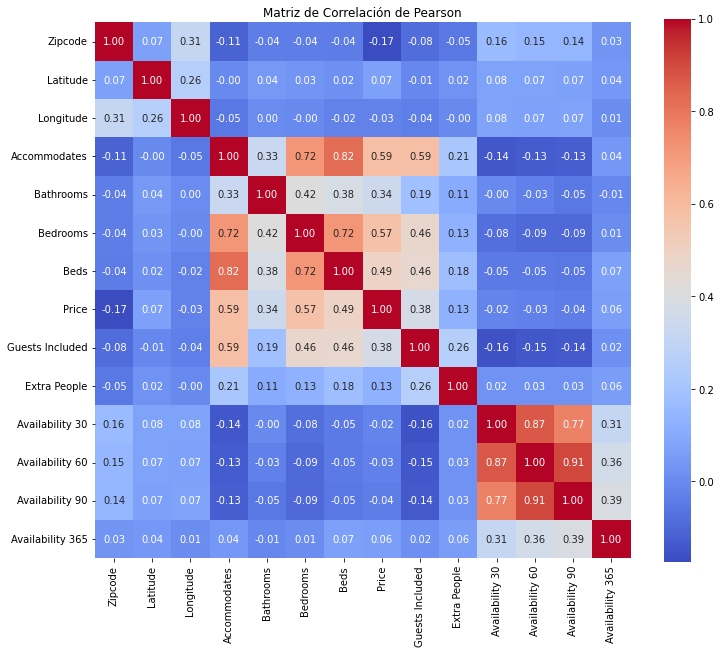

 Las celdas en rojo/naranja representan correlaciones positivas
Mientras que las celdas en azul representan correlaciones negativas.
Las celdas con un valor cercano a 1 o -1 indican una alta correlación entre las variables.


In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear matriz de correlación de Pearson
corr_matrix = data.corr(method='pearson')

# Crear mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Matriz de Correlación de Pearson')
plt.show()
print(' Las celdas en rojo/naranja representan correlaciones positivas')
print('Mientras que las celdas en azul representan correlaciones negativas.',)
print('Las celdas con un valor cercano a 1 o -1 indican una alta correlación entre las variables.')

Como podemos ver en la grafica de correlación de Pearson, las variables que tienen una correlación cercana a 1 son bed con accommodates, availability (las 4 col) entre ellas mismas, y Guests included con accommodates.

In [167]:
print('nos quedamos con availability 360,','bed y','guest included')
data.drop(['Availability 30','Availability 60','Availability 90','Accommodates'], axis=1, inplace=True)

nos quedamos con availability 360, bed y guest included


Despues de haber limpiado esas columnas queda mucho mas limpia la grafica anterior quedando la corelacion mas alta entre beds y bedrooms

In [168]:
#Vamos a eliminar las filas con precios mayores a 200
data = data[data['Price'] < 200]
price=data['Price']
data.drop(['Price'], axis=1, inplace=True)

<ipython-input-168-1cd42abd1c12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Price'], axis=1, inplace=True)


In [169]:
print(data.dtypes)


Neighbourhood Group Cleansed     object
Zipcode                           int64
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Guests Included                   int64
Extra People                    float64
Availability 365                float64
Cancellation Policy              object
Features                         object
dtype: object


In [170]:
print(data.shape)

(12393, 15)


In [171]:
data.describe

<bound method NDFrame.describe of       Neighbourhood Group Cleansed  Zipcode   Latitude  Longitude  \
3                           Centro    28005  40.410106  -3.714754   
4                           Centro    28013  40.416969  -3.709439   
7                           Centro    28005  40.416514  -3.717843   
8                           Centro    28013  40.416834  -3.710240   
9                           Centro    28012  40.413945  -3.705637   
...                            ...      ...        ...        ...   
14715                       Centro    28015  40.423878  -3.708321   
14716                       Centro    28004  40.424988  -3.702364   
14717                       Centro    28015  40.425166  -3.710959   
14718                       Centro    28015  40.429196  -3.706743   
14720                       Centro    28015  40.425181  -3.710374   

      Property Type        Room Type  Bathrooms  Bedrooms  Beds  Bed Type  \
3         Apartment     Private room        1.0  1.000000   

#Dividimos el dataset en train y test.

#Iniciamos Pruebas con diferentes modelos de regresion


In [172]:
# Import libraries
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Definimos features
features = ['Guests Included', 'Extra People','Bathrooms', 'Bedrooms', 'Beds', 'Neighbourhood Group Cleansed','Room Type','Availability 365', 'Zipcode','Features']

# Creamos data subset con features
data_subset = data[features ].copy()

# Convertimos la variable categorica a dummies 
data_subset = pd.get_dummies(data_subset)

# Hacemos un Split de data a training y test sets
X_train, X_test, y_train, y_test = train_test_split(data_subset, price, test_size=0.2, random_state=42)

# Scale de features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define los hiperparámetros a ajustar
parameters = {'alpha': np.logspace(-3, 3, 7)}

# Crea un objeto de modelo Lasso
lasso_model = Lasso()

# Realiza la búsqueda de hiperparámetros en cuadrícula
grid_search = GridSearchCV(lasso_model, parameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Obtiene el mejor conjunto de hiperparámetros y su rendimiento
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.711e+03, tolerance: 9.935e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+04, tolerance: 1.023e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+04, tolerance: 1.014e+03

{'alpha': 0.1}

In [173]:
# Importar y crear una instancia del modelo Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
gbr.fit(X_train, y_train)

# Evaluar el rendimiento del modelo con los datos de prueba
from sklearn.metrics import mean_squared_error, r2_score

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)







MSE: 459.60584753045765
R²: 0.653550672013493


In [174]:

# Fit Lasso regression model
lasso = Lasso(alpha=0.1, fit_intercept=True,  precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Print coefficients of Lasso regression model
coef = pd.Series(lasso.coef_, index=X_train.columns)
print('Lasso picked ' + str(sum(coef != 0)) + ' variables and eliminated the other ' + str(sum(coef == 0)) + ' variables')
print(coef)


from sklearn.metrics import mean_squared_error, r2_score
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

Lasso picked 72 variables and eliminated the other 19 variables
Guests Included                                                                                                                    3.885470
Extra People                                                                                                                       0.227034
Bathrooms                                                                                                                          3.535236
Bedrooms                                                                                                                           8.255998
Beds                                                                                                                               2.163830
                                                                                                                                     ...   
Features_Host Is Superhost,Host Has Profile Pic,Requires License,Require Guest Profile Picture,R

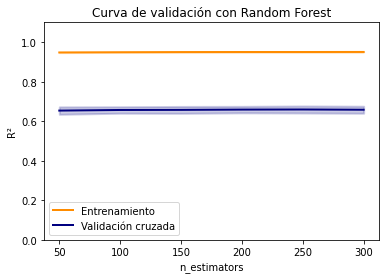

In [175]:
#Evaluacion de hiperparametros para random forest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Definir el rango de valores para n_estimators
param_range = [50, 100, 150, 200, 250, 300]

# Usar la función validation_curve para generar los datos de entrenamiento y validación para cada valor de n_estimators
train_scores, test_scores = validation_curve(
    RandomForestRegressor(), X_train, y_train, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="r2", n_jobs=-1)

# Calcular la media y la desviación estándar de los scores para cada valor de n_estimators
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar los resultados de la curva de validación
plt.title("Curva de validación con Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("R²")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_mean, label="Entrenamiento",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_mean, label="Validación cruzada",
             color="navy", lw=lw)
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [176]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score



# modelo con Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=8)
print(f"Random Forest R^2: {rf_scores.mean():.3f} +/- {rf_scores.std():.3f}")

# modelo con Lasso
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=8)
print(f"Lasso R^2: {lasso_scores.mean():.3f} +/- {lasso_scores.std():.3f}")


Random Forest R^2: 0.659 +/- 0.026
Lasso R^2: 0.566 +/- 0.028


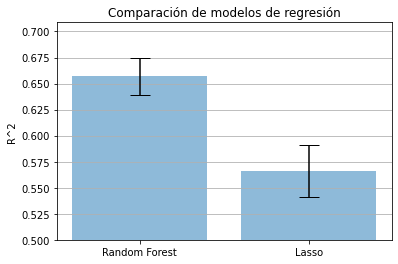

In [177]:
import matplotlib.pyplot as plt

# Definir los valores medios y desviaciones estándar de R^2 para cada modelo
random_forest_mean = 0.657
random_forest_std = 0.018
lasso_mean = 0.566
lasso_std = 0.025

# Definir los nombres de los modelos
models = ['Random Forest', 'Lasso']

# Definir los valores medios y desviaciones estándar en una lista
means = [random_forest_mean, lasso_mean]
stds = [random_forest_std, lasso_std]

# Crear el gráfico de barras con barras de error
fig, ax = plt.subplots()
ax.bar(models, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('R^2')
ax.set_ylim(bottom=0.5)  # Para asegurarse de que el eje y comience en 0.5
ax.set_title('Comparación de modelos de regresión')
ax.yaxis.grid(True)

# Mostrar el gráfico
plt.show()


In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, price.values, test_size=0.2, shuffle=True,random_state=42)

In [179]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)



X_train shape: (9914, 15)
X_test shape: (2479, 15)
y_train shape: (9914,)
y_test shape: (2479,)


In [180]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Seleccione las columnas numéricas y categóricas para su preprocesamiento
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Creacion preprocesadores para cada tipo de columna
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine los preprocesadores en un solo preprocesador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [181]:
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Ajustar el modelo combinado en el conjunto de datos de entrenamiento
final_model.fit(X_train, y_train)

# Predecir los precios en el conjunto de datos de prueba utilizando el modelo combinado
y_pred = final_model.predict(X_test)




In [182]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluar el rendimiento del modelo combinado
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 21.01
R^2: 0.67


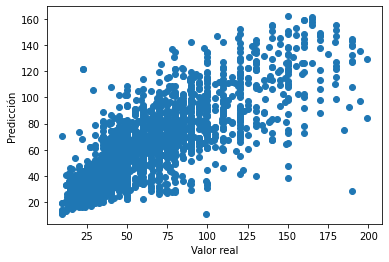

In [183]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.scatter(y_test, y_pred)

# etiquetas de los ejes
plt.xlabel('Valor real')
plt.ylabel('Predicción')

plt.show()



In [184]:
#visualizar el valor real con respecto a la predicción
for gt, pred  in zip(y_test, y_pred):
  error=gt - pred
  print(f'Real: {gt:.2f} Predicho: {pred:.2f}. Error: {error:.2f}')

Real: 130.00 Predicho: 127.97. Error: 2.03
Real: 24.00 Predicho: 34.75. Error: -10.75
Real: 31.00 Predicho: 39.26. Error: -8.26
Real: 49.00 Predicho: 80.79. Error: -31.79
Real: 49.00 Predicho: 72.51. Error: -23.51
Real: 14.00 Predicho: 36.33. Error: -22.33
Real: 110.00 Predicho: 76.21. Error: 33.79
Real: 80.00 Predicho: 65.50. Error: 14.50
Real: 20.00 Predicho: 27.27. Error: -7.27
Real: 24.00 Predicho: 30.87. Error: -6.87
Real: 130.00 Predicho: 141.50. Error: -11.50
Real: 35.00 Predicho: 28.94. Error: 6.06
Real: 90.00 Predicho: 85.93. Error: 4.07
Real: 49.00 Predicho: 55.23. Error: -6.23
Real: 65.00 Predicho: 66.72. Error: -1.72
Real: 15.00 Predicho: 25.05. Error: -10.05
Real: 42.00 Predicho: 84.47. Error: -42.47
Real: 22.00 Predicho: 26.34. Error: -4.34
Real: 50.00 Predicho: 80.68. Error: -30.68
Real: 55.00 Predicho: 89.52. Error: -34.52
Real: 160.00 Predicho: 144.89. Error: 15.11
Real: 35.00 Predicho: 20.09. Error: 14.91
Real: 100.00 Predicho: 75.13. Error: 24.87
Real: 18.00 Predicho

Despues haber utilizado diferentes modelos y observar sus resultados vemos que el random forest da el mejor resultado con un error medio de prediccion de 21euro.